# Construir un modelo de clasificación para detectar pacientes con riesgo de vida a partir del conjunto de datos "Derecho de solicitud" en el sistema de salud colombiano

El derecho de solicitud es una herramienta democratica para comunicar al ciudadano con el gobierno, garantizando que que el gobierno cumpla sus obligaciones, una vez un ciudadano presenta un "derecho de solicitud", el gobierno tiene de 10 a 30 días para resolver el caso. Esto significa que el gobierno debe asegurarse de tener los procedimientos y la infraestructura para resolver los derechos de petición lo antes posible.

Uno de los derechos básicos en Colombia es el derecho a la salud, es por ello que Colombia a creado diferente recursos en internet como supersalud, entidad que recibe miles de derechos de petición los cuales su tarea es ordenarlos y priorizarlos de acuerdo a un posible riesgo de vida. Siendo importante entender que pueden existir casos sobre ciudadanos cuya vida podría estar en riesgo.

Es posible que un profesional en salud identifique estos riesgos y tome una decisión correcta, pero el volumen de casos puede eventualmente exceder la capacidad para responder rápidamente una solicitud.

Un conjunto de datos del "derecho de solicitud" de Supersalud está disponible para el público a través del portal de datos abiertos del gobierno, Este conjunto de datos contiene información relacionada con el paciente y una caracter que indica si la vida del paciente está en riesgo; siendo adecuado para un modelo de clasificación que puede predecir si los nuevos pacientes que están surgiendo nuevos "derechos de solicitud" tienen su vida en riesgo automáticamente ahorrando tiempo tanto para el gobierno como para el paciente.

La estrategía para la construcción del pipeline es la siguiente:
- **Análisis de datos**
- **Preprocesamiento:** Unificando los datos separados del año 2015, 2016 y 2017. 
- **Construcción del modelo**
- **Selección de los hiperparámetros:** Selección de 3 diferentes clasificadores.
- **Validación**
- **Métricas:** La métrica que se usará F-Beta, porque necesita evitar falsos negativos, ya que no queremos que las personas con vida en riesgo no estén en riesgo.

## Exploración de datos y visualización

Las 45 características del conjunto de datos son categoricos, proporcionando información relacionada con el ciudadano que plantea el derecho de solicitud, añadiendo además que el conjunto de datos contiene 2'375.371 registros que se dividirán en conjuntos de entrenamiento, prueba y validación.
En esta etapa se realizaron diferentes gráficos mostrando características categóricas de alto desequilibrio con alta cardinalidad.

## Missing Data
Una observación más detallada del conjunto de datos muestra varios registros con información faltante que pueden afectar el rendimiento del modelo. Por esa razón, se crearon dos conjuntos de datos, un conjunto de datos completo que ignora el hecho de registros con datos faltantes, y un conjunto de datos reducido con registros con no más de 3 datos faltantes por fila. 

## Algoritmos y técnicas

Se realizó una limpieza inicial sobre el conjunto de datos para abordar los valores incorrectos en las características. Además, según la documentación oficial, algunas características carecen de significado estadístico, por lo que también se eliminaron.
La codificación media se aplicó como una solución al problema de alta cardinalidad, también se aplicó la transformación de valores para normalizar el conjunto de datos para abordar el bajo peso de correlación con la variable objetivo.

Para ayudar a aumentar el puntaje, se seleccionaron los alumnos del conjunto RandomForestClassifier y AdaBoostClassifier debido a la velocidad relativamente baja para el entrenamiento con los parámetros predeterminados y la búsqueda de cuadrícula.
Gaussian Naive Bayes también fue considerado porque trata con valores reales y el conjunto de datos se compone de valores reales después del preprocesamiento.

## Procesamiento de datos
- Removiendo campos que no tenía un valor estadístico como identficadores or id's.
- Casos especiales con algunas características.
- Datos redundantes.
- Análisis de correlaciones.

## Implementación
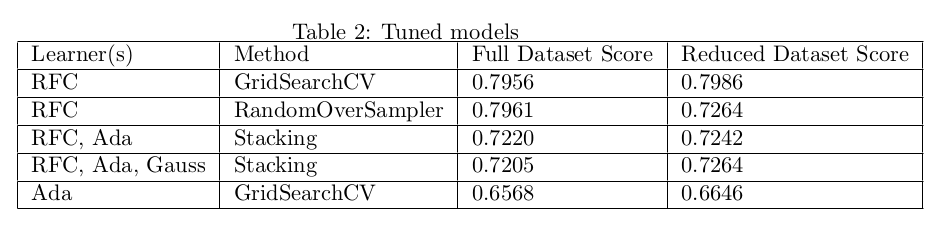
Como se observa, los algoritmos boost tuvieron un rendimiento muy similar entre el 70 y 75 por ciento.

## Refinamiento

A continuación, se aplicó la optimización de búsqueda de cuadrícula, apilamiento y sobremuestreo para las dos mejores puntuaciones del modelo. También se probó la optimización de hiperparámetros, pero tardó demasiado en completarse con el hardware disponible y se descartó para este proyecto.
Después de ejecutar varias estrategias para mejorar un modelo, RandomForestClassifier obtuvo el mejor puntaje de 0.7986 con el conjunto de datos reducido.
Aunque el modelo final logró alcanzar un puntaje de aproximadamente el 80%, sigue siendo un puntaje bajo dado que el objetivo es detectar personas con riesgo de vida.

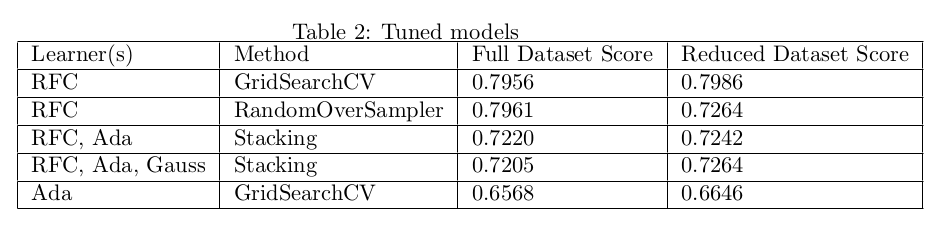

## Conclusiones

El conjunto de datos tiene datos muy desequilibrados, tanto en las características como en las características de destino. Aproximadamente el 15% de los registros tiene un objetivo, pacientes con riesgo de vida. Otro desafío es la baja correlación entre la etiqueta de destino y las características del conjunto de datos. El paso de preprocesamiento permitió un comportamiento más equilibrado con las características del conjunto de datos.

Una mirada más cercana al diagrama de fuerza muestra la relevancia de las características COD MOTESP (Motivo del derecho de solicitud), PATOLOGIA TIPO (Tipo de patología) y PQR CANAL (Canal de comunicación) que tiene sentido como la decisión de si la vida de un paciente es o no en riesgo de no debe estar relacionado con el paciente.

También vale la pena señalar que casi todas las características contribuyen a la predicción del modelo. En general, todos los modelos dieron una puntuación de alrededor del 70% (incluido el modelo CNN) y el 80% (para los sintonizados), lo que podría sugerir que todos los modelos convergían a soluciones similares, por lo que vale la pena considerar que esto podría ser lo mejor que pueden ofrecer los datos.

Se tuvieron en cuenta varias estrategias: ajuste de hiperparámetro, sobremuestreo y apilamiento, siendo el ajuste de hiperparámetro el que dio mejores resultados con una puntuación de aproximadamente el 80%.